In [15]:
from torcheeg.datasets import FACEDFeatureDataset
from torcheeg import transforms
from torcheeg.datasets.constants import FACED_CHANNEL_LOCATION_DICT
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from collections import Counter

<h1>Load preprocessed data</h1>

<h1>Получить уже препроцессед данные с кэша</h1>

In [16]:
dataset = FACEDFeatureDataset(
    io_path='.torcheeg/faced_pickle_cache',  # уже готовый LMDB-кэш
    online_transform=transforms.ToTensor(),
    label_transform=transforms.Select('emotion'),
    io_mode='pickle'
)

[2025-08-06 14:43:14] INFO (torcheeg/MainThread) 🔍 | Detected cached processing results, reading cache from .torcheeg/faced_pickle_cache.


<h1>Plot labels</h1>

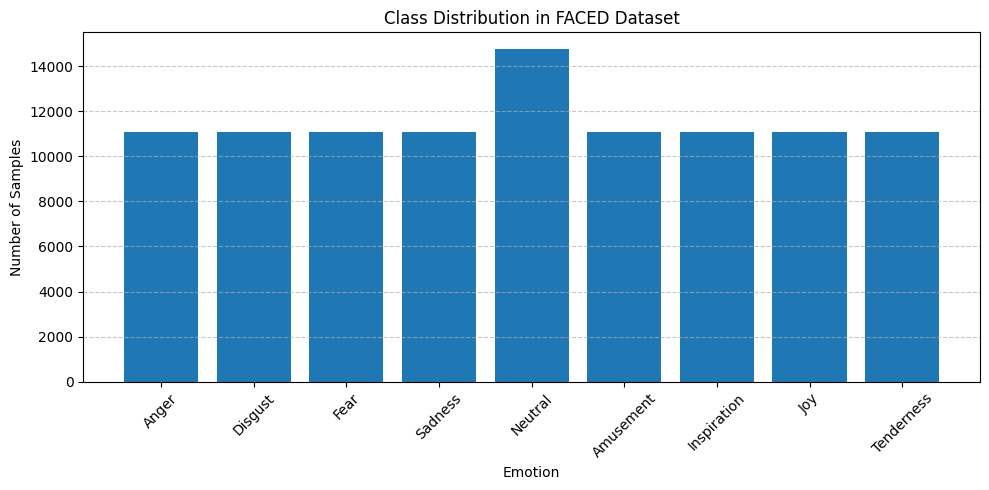

In [58]:
# Extract all labels
all_labels = [dataset[i][1] for i in range(len(dataset))]

# Count label frequency
label_counts = Counter(all_labels)

# Emotion label names (0–8)
emotion_names = [
    "Anger", "Disgust", "Fear", "Sadness", "Neutral",
    "Amusement", "Inspiration", "Joy", "Tenderness"
]

# Plot
plt.figure(figsize=(10, 5))
plt.bar([emotion_names[i] for i in label_counts.keys()], label_counts.values())
plt.title("Class Distribution in FACED Dataset")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Load data</h1>

In [17]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

X = []
y = []

for i in range(min(100000, len(dataset))):
    eeg_tensor, label = dataset[i]
    eeg_flat = eeg_tensor.view(-1).numpy()  # [360] или другая форма
    X.append(eeg_flat)
    y.append(label)

In [18]:
from sklearn.model_selection import train_test_split
# Split the data (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>Imports</h1>

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from xgboost import XGBClassifier

<h1>Models</h1>

In [ ]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # 'f1_macro' for multi-class

# Measure cross-validation time
start_time_cv = time.time()
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Extract and print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %0.2f (± %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std()))
print("F1 Macro Score: %0.2f (± %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

In [ ]:
# Initialize XGBoost model
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=9,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # 'f1_macro' for multi-class

# Measure cross-validation time
start_time_cv = time.time()
cv_results = cross_validate(xgb, X_train, y_train, cv=5, scoring=scoring)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Extract and print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %0.2f (± %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std()))
print("F1 Macro Score: %0.2f (± %0.2f)" % (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

In [ ]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # Consistent with multi-class setup

# Measure cross-validation time
start_time_cv = time.time()
scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %.2f (± %.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Macro Score: %.2f (± %.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

In [ ]:
# Инициализация модели
log_reg = LogisticRegression(max_iter=1000)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # Consistent with multi-class setup

# Measure cross-validation time
start_time_cv = time.time()
scores = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %.2f (± %.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Macro Score: %.2f (± %.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

In [ ]:
# Инициализация модели
dt = DecisionTreeClassifier(random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # Consistent with multi-class setup

# Measure cross-validation time
start_time_cv = time.time()
scores = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %.2f (± %.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Macro Score: %.2f (± %.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

In [ ]:
# Инициализация модели
lgbm = LGBMClassifier(objective='multiclass', num_class=9, random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # Consistent with multi-class setup

# Measure cross-validation time
start_time_cv = time.time()
scores = cross_validate(lgbm, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy: %.2f (± %.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Macro Score: %.2f (± %.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

<h1>Grid search</h1>

In [12]:
import time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softmax', num_class=9, silent=True, nthread=1)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 26 minutes and 15.05 seconds.


In [13]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([266.34351659, 398.72638234, 385.51045497, 285.03891985,
       274.62919744]), 'std_fit_time': array([ 0.39966618,  1.85893821, 18.55697159, 14.85967076,  7.43737269]), 'mean_score_time': array([1.7418352 , 2.70824631, 2.86719505, 2.03072945, 1.61419606]), 'std_score_time': array([0.13665807, 0.15648878, 0.13865955, 0.14490868, 0.09741884]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_gamma': masked_array(data=[5.0, 1.5, 1.0, 5.0, 1.0],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'param_colsample_bytree': masked_array(data=[1.0, 0

In [ ]:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_class=9, ...)

In [20]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# --- 1. Recreate the XGBClassifier with the best hyperparameters ---
# Define the best hyperparameters as found from your search
best_hyperparameters = {
    'subsample': 1.0,
    'min_child_weight': 5,
    'max_depth': 3,
    'gamma': 5,
    'colsample_bytree': 1.0
}

# Define other parameters from your original XGBClassifier object
# Note: 'num_class' is important for multi-class classification
# 'n_estimators' and 'learning_rate' are also crucial
other_params = {
    'n_estimators': 600,
    'learning_rate': 0.02,
    'num_class': 9,  # As specified in your original XGBClassifier output
    'enable_categorical': False,
    'nthread': 1, # Using nthread instead of n_jobs as per your output
    # 'device': None, # Keep as None or remove if not explicitly using GPU
    # 'eval_metric': None, # Keep as None or specify if you have one
    # 'missing': np.nan, # If your data has NaN, ensure this is set correctly
}

# Combine all parameters
xgb_params = {**best_hyperparameters, **other_params}

# Initialize the XGBClassifier
# Ensure that all parameters are passed correctly.
# For 'missing', it's often better to handle missing values before passing to XGBoost.
# If you have actual NaN values in your data, ensure 'missing=np.nan' is explicitly passed.
model = xgb.XGBClassifier(
    objective='multi:softmax', # Use multi:softprob for multi-class classification to get probabilities
    **xgb_params
)

# --- 3. Fit the model on the training data ---
print("Training the XGBoost model...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Make predictions on X_test ---
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities (useful for AUC, Gini, or custom thresholds)
y_pred_proba = model.predict_proba(X_test)

print("\n--- Predictions ---")
print("First 10 predicted labels:", y_pred[:10])
print("First 10 true labels:", y_test[:10])
print("Shape of predicted probabilities:", y_pred_proba.shape)

# --- 5. Evaluate the predictions against y_test ---
print("\n--- Evaluation Metrics ---")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (provides precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Normalized Gini Score (if applicable for your problem)
# Note: For multi-class classification, calculating a single "normalized gini" is not straightforward
# and usually involves averaging per-class AUC or using a specific competition metric.
# If your problem is binary classification, you can calculate AUC and then Gini.
# For multi-class, you might need a custom function or average AUCs.
# Assuming you might have a binary problem or a specific way to calculate Gini for multi-class:
# if model.num_class == 2:
#     # For binary classification, calculate AUC and then Gini
#     auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
#     normalized_gini = 2 * auc_score - 1
#     print(f"Normalized Gini Score (for binary classification): {normalized_gini:.4f}")
# else:
#     print("Normalized Gini score calculation is typically for binary classification.")
#     print("For multi-class, consider macro/weighted AUC or a custom metric.")

# Example for multi-class AUC (One-vs-Rest)
try:
    # Ensure y_test is one-hot encoded for roc_auc_score with 'ovr' multi_class strategy
    # if not already in that format.
    # For simplicity, if y_test is integer labels, roc_auc_score can handle it with 'ovr'
    # if `labels` argument is provided.
    auc_ovr = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    print(f"Macro-averaged One-vs-Rest AUC: {auc_ovr:.4f}")
except ValueError as e:
    print(f"Could not calculate multi-class AUC: {e}")
    print("Ensure y_test labels are correctly formatted for AUC calculation.")



Training the XGBoost model...
Model training complete.

--- Predictions ---
First 10 predicted labels: [4 4 8 2 8 4 3 2 4 2]
First 10 true labels: [1, 4, 5, 2, 6, 8, 0, 3, 3, 5]
Shape of predicted probabilities: (20000, 9)

--- Evaluation Metrics ---
Accuracy: 0.2772

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24      2112
           1       0.28      0.37      0.32      2160
           2       0.29      0.25      0.27      2157
           3       0.30      0.17      0.22      2107
           4       0.25      0.62      0.36      2804
           5       0.28      0.26      0.27      2165
           6       0.30      0.14      0.19      2108
           7       0.29      0.14      0.19      2142
           8       0.29      0.25      0.27      2245

    accuracy                           0.28     20000
   macro avg       0.29      0.26      0.26     20000
weighted avg       0.29      0.28      0.26     20000

Mac

In [21]:
from sklearn.model_selection import GridSearchCV
import time
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate

# Инициализация модели
lgbm = LGBMClassifier(objective='multiclass', num_class=9, random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']  # Consistent with multi-class setup

# Define parameter grid for grid search
param_grid = {
    'num_leaves': [31, 50, 70],           # Number of leaves in one tree
    'max_depth': [10, 20],            # Maximum tree depth, -1 for unlimited
    'learning_rate': [0.1],   # Learning rate
    'n_estimators': [200]       # Number of boosting iterations
}



# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,                                # 5-fold cross-validation
    scoring=scoring,
    refit='f1_macro',                    # Refit model using f1_macro as the primary metric
    n_jobs=-1,                           # Use all available CPU cores
    verbose=1,
    return_train_score=False
)

# Measure grid search time
start_time_gs = time.time()
grid_search.fit(X_train, y_train)
end_time_gs = time.time()
gs_time = end_time_gs - start_time_gs

# Print grid search results
print("\nGrid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Macro Score: {grid_search.best_score_:.2f}")
print(f"Grid Search Time: {gs_time:.2f} seconds")

# Evaluate the best model with cross-validation
best_model = grid_search.best_estimator_
start_time_cv = time.time()
scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
end_time_cv = time.time()
cv_time = end_time_cv - start_time_cv

# Print cross-validation results for the best model
print("\nCross-Validation Results for Best Model:")
print(f"Accuracy: {scores['test_accuracy'].mean():.2f} (± {scores['test_accuracy'].std():.2f})")
print(f"F1 Macro Score: {scores['test_f1_macro'].mean():.2f} (± {scores['test_f1_macro'].std():.2f})")
print(f"Cross-Validation Time: {cv_time:.2f} seconds")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 150
[LightGBM] [Info] Start training from score -2.225856
[LightGBM] [Info] Start training from score -2.236095
[LightGBM] [Info] Start training from score -2.235745
[LightGBM] [Info] Start training from score -2.229916
[LightGBM] [Info] Start training from score -1.941769
[LightGBM] [Info] Start training from score -2.236680
[LightGBM] [Info] Start training from score -2.230032
[LightGBM] [Info] Start training from score -2.233992
[LightGBM] [Info] Start training from score -2.246087

Grid Search Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 70}
Best F1 Macro Score: 0.65
Grid Search Time:

In [46]:
lgbm = LGBMClassifier(objective='multiclass',
                      num_class=9,
                      random_state=42,
                      learning_rate=0.1, 
                      max_depth=20, 
                      n_estimators=800, 
                      num_leaves=100, 
                      colsample_bytree=0.8,
                      subsample=0.8,
                      reg_lambda=0.1,
                      reg_alpha=0.1
                     )
scores = cross_validate(lgbm, X_train, y_train, cv=2, scoring=scoring, return_train_score=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 150
[LightGBM] [Info] Start training from score -2.225856
[LightGBM] [Info] Start training from score -2.236095
[LightGBM] [Info] Start training from score -2.235861
[LightGBM] [Info] Start training from score -2.229799
[LightGBM] [Info] Start training from score -1.941769
[LightGBM] [Info] Start training from score -2.236797
[LightGBM] [Info] Start training from score -2.230032
[LightGBM] [Info] Start training from score -2.233992
[LightGBM] [Info] Start training from score -2.245968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [47]:
print(f"Accuracy: {scores['test_accuracy'].mean():.2f} (± {scores['test_accuracy'].std():.2f})")
print(f"F1 Macro Score: {scores['test_f1_macro'].mean():.2f} (± {scores['test_f1_macro'].std():.2f})")

Accuracy: 0.60 (± 0.00)
F1 Macro Score: 0.60 (± 0.00)


In [52]:
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

# Initialize the base LightGBM model with fixed hyperparameters
lgbm = LGBMClassifier(
    objective='multiclass',
    num_classes=9,
    num_leaves=100,
    max_depth=40,
    learning_rate=0.1,
    n_estimators=800,
    random_state=42
)

# Wrap LightGBM in OneVsRestClassifier for multiclass classification
ovr_lgbm = OneVsRestClassifier(lgbm)

# Measure training time
start_time = time.time()
ovr_lgbm.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Evaluate on test set
y_pred = ovr_lgbm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print results
print("\nOvR LightGBM Results:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test F1 Macro Score: {f1_macro:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 150
[LightGBM] [Info] Start training from score -0.114261
[LightGBM] [Info] Start training from score -2.225856
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] N

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

# Initialize the base LightGBM model
lgbm = LGBMClassifier(objective='binary', random_state=42)

# Wrap LightGBM in OneVsRestClassifier for multiclass classification
ovr_lgbm = OneVsRestClassifier(lgbm)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']

# Define parameter grid for grid search
param_grid = {
    'estimator__num_leaves': [50, 100, 150],  # Number of leaves in one tree
    'estimator__max_depth': [20, 40],         # Maximum tree depth
    'estimator__learning_rate': [0.05, 0.1],  # Learning rate
    'estimator__n_estimators': [400, 800]     # Number of boosting iterations
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ovr_lgbm,
    param_grid=param_grid,
    cv=5,                                # 5-fold cross-validation
    scoring=scoring,
    refit='f1_macro',                    # Refit model using f1_macro as the primary metric
    n_jobs=-1,                           # Use all available CPU cores
    verbose=1,
    return_train_score=False
)

# Measure grid search time
start_time_gs = time.time()
grid_search.fit(X_train, y_train)
end_time_gs = time.time()
gs_time = end_time_gs - start_time_gs

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print grid search and evaluation results
print("\nGrid Search Results (OvR LightGBM):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Macro Score (CV): {grid_search.best_score_:.2f}")
print(f"Grid Search Time: {gs_time:.2f} seconds")
print("\nTest Set Results for Best Model:")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test F1 Macro Score: {f1_macro:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 8638, number of negative: 71362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.107975 -> initscore=-2.111594
[LightGBM] [Info] Start training from score -2.111594
[LightGBM] [Info] Number of positive: 8550, number of negative: 71450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106875 -> initscore=-2.123067
[L

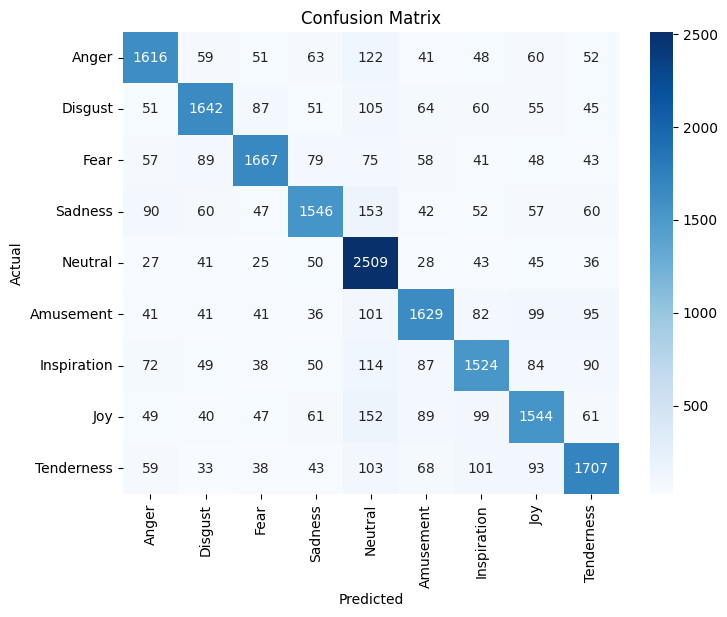

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred are available from your previous code
conf_matrix = confusion_matrix(y_test, y_pred)

# Emotion label names based on FACED dataset
emotion_names = [
    "Anger", "Disgust", "Fear", "Sadness", "Neutral",
    "Amusement", "Inspiration", "Joy", "Tenderness"
]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=emotion_names, yticklabels=emotion_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('ConfusionMatrix.png')
plt.show()
